<a href="https://colab.research.google.com/github/b240317-prog/csvfile/blob/main/%E5%A4%9A%E5%A4%89%E9%87%8F%E8%A7%A3%E6%9E%90%E3%83%AC%E3%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#多変量解析第二回レポート　47都道府県の人口によるクラスター分析

##1. はじめに

本レポートでは、前後半でそれぞれ2024年度の47都道府県の総人口（人・割合）、15歳未満人口（人・割合）、15～64歳人口（人・割合）、65歳以上人口（人・割合）の4変量を用いてクラスター分析を行い、どのような傾向が読み取れるかを検討する。

##2.データと手法
###2.1 データの概要
データは以下の政府統計サイト（e-Stat）から取得した。
https://www.e-stat.go.jp/dbview?sid=0000010101

またcsvファイルは以下の通りである。元データをExcelで開き、桁区切りのカンマを除去し、不要な行や列を削除した。その後、UTF-8形式のCSVファイルとして保存し、GitHubにアップロードしてraw URLを取得した。
https://raw.githubusercontent.com/b240317-prog/csvfile/refs/heads/main/FEH_00200502_251014131447.csv


後半では15歳未満人口（%）、15~64歳人口（%）、65歳以上人口（%）、人口増加率（%）の割合でクラスタリングした。csvファイルは以下の通り。

https://raw.githubusercontent.com/b240317-prog/csvfile3/refs/heads/main/FEH_00200502_251015182518.csv



###2.2 Rでの分析(前半)
本分析では、日本の地域ごとの特性や役割を確認することを目的とする。
まずは日本語テキストを使用できるようにする。

In [ ]:
install.packages(c("showtext", "sysfonts"))
library(showtext)
library(sysfonts)
font_add_google("Noto Sans JP", "noto")
showtext_auto()

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



次に、用意したcsvファイルをdat1に格納する。

In [ ]:
dat1 = read.csv('https://raw.githubusercontent.com/b240317-prog/csvfile/refs/heads/main/FEH_00200502_251014131447.csv', row.names=1)

まずはそのままプロットしてみる。

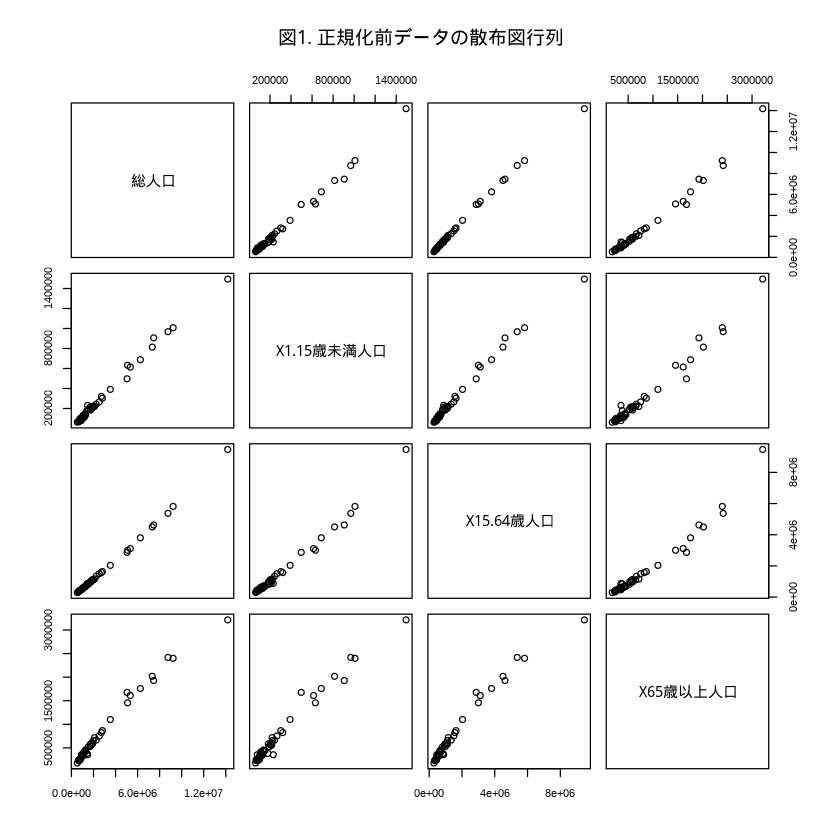

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(dat1, main="図1. 正規化前データの散布図行列")

基本統計量も確認する。

In [ ]:
print('表1')
summary(dat1)

[1] "表1"


     総人口         X1.15歳未満人口    X15.64歳人口     X65歳以上人口    
 Min.   :  531000   Min.   :  63000   Min.   : 289000   Min.   : 179000  
 1st Qu.: 1022000   1st Qu.: 109500   1st Qu.: 557000   1st Qu.: 352500  
 Median : 1532000   Median : 191000   Median : 880000   Median : 524000  
 Mean   : 2634106   Mean   : 294149   Mean   :1568681   Mean   : 771085  
 3rd Qu.: 2617000   3rd Qu.: 284500   3rd Qu.:1535500   3rd Qu.: 788000  
 Max.   :14178000   Max.   :1494000   Max.   :9469000   Max.   :3215000  

まず、Ward法を用いて4変量をクラスタリングした。

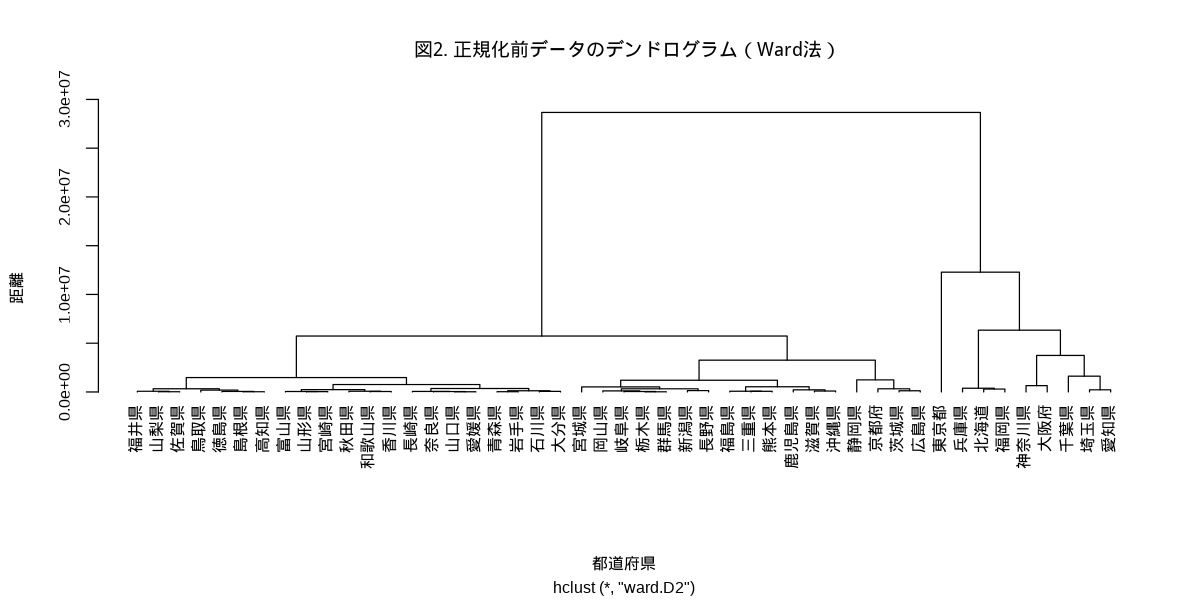

In [ ]:
hc = hclust(dist(dat1),method="ward.D2")
options(repr.plot.width = 10, repr.plot.height = 5)
plot(hc, hang=-1, main="図2. 正規化前データのデンドログラム（Ward法）",
     xlab="都道府県", ylab="距離")

デンドログラムから見ると、2クラスターが適切と推測されるが、クラスター数決定の参考とするため、エルボー法とシルエット法を適用する。

In [ ]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("factoextra"):
“installation of package ‘factoextra’ had non-zero exit status”


エルボー法とシルエット法のプロットを描画する。

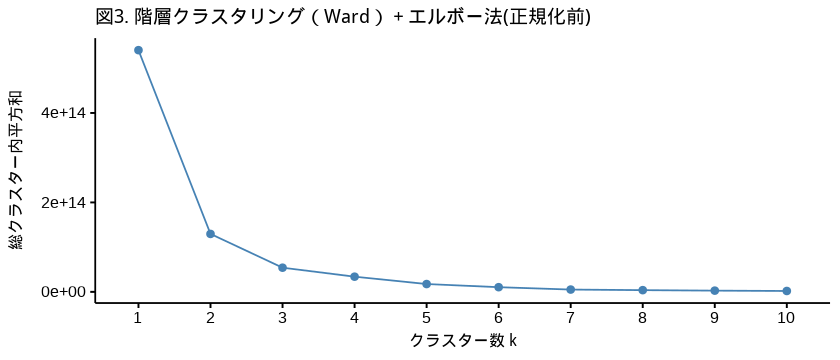

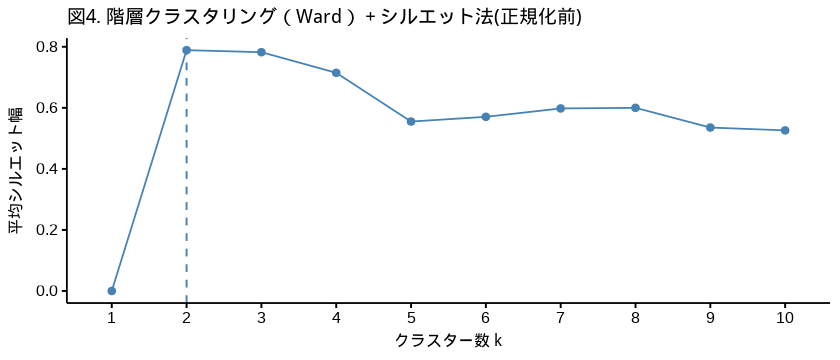

In [ ]:
library(factoextra)
options(repr.plot.width = 7, repr.plot.height = 3)
fviz_nbclust(dat1, FUN = hcut, method = "wss", hc_method = "ward.D2")+
labs(title = "図3. 階層クラスタリング（Ward）＋エルボー法(正規化前)",x = "クラスター数 k", y = "総クラスター内平方和")
fviz_nbclust(dat1, FUN = hcut, method = "silhouette", hc_method = "ward.D2")+
labs(title = "図4. 階層クラスタリング（Ward）＋シルエット法(正規化前)",x = "クラスター数 k", y = "平均シルエット幅")

上記グラフより、2クラスターとしてクラスタ番号を保存する。

In [ ]:
cn = cutree(hc,2)

実際にプロットしてみる。

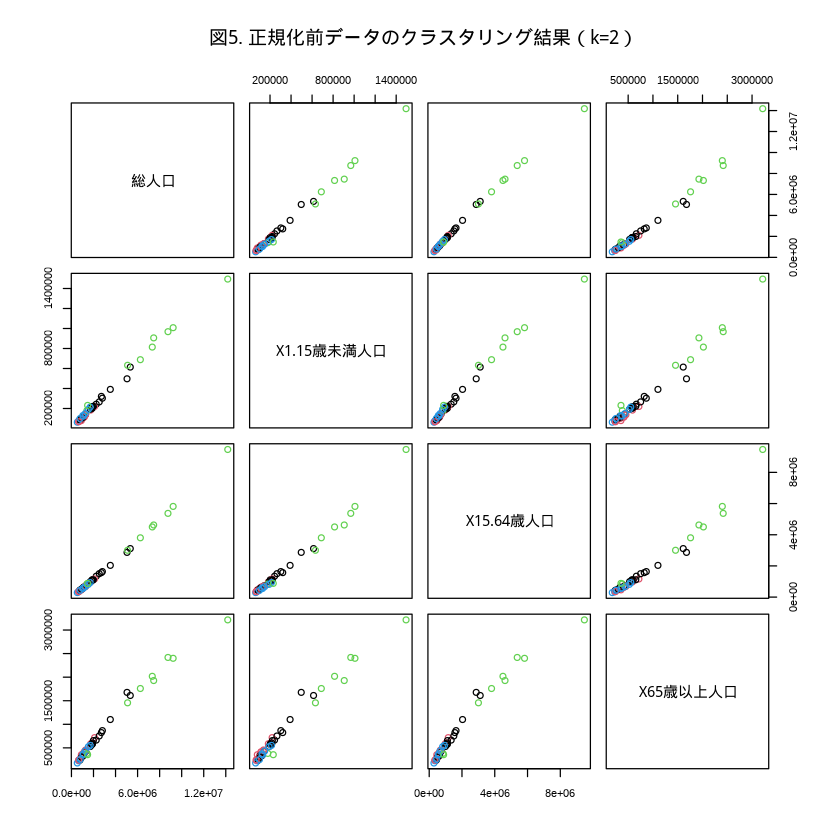

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(dat1, col=cn, main="図5. 正規化前データのクラスタリング結果（k=2）")

プロットされた結果から分かるように、すべての変量間でほぼ正比例の関係が見られ、左下と右上の2つの群に分かれていることが確認できる。この結果は人口規模に強く依存している可能性があるため、データを正規化して再分析を行った。



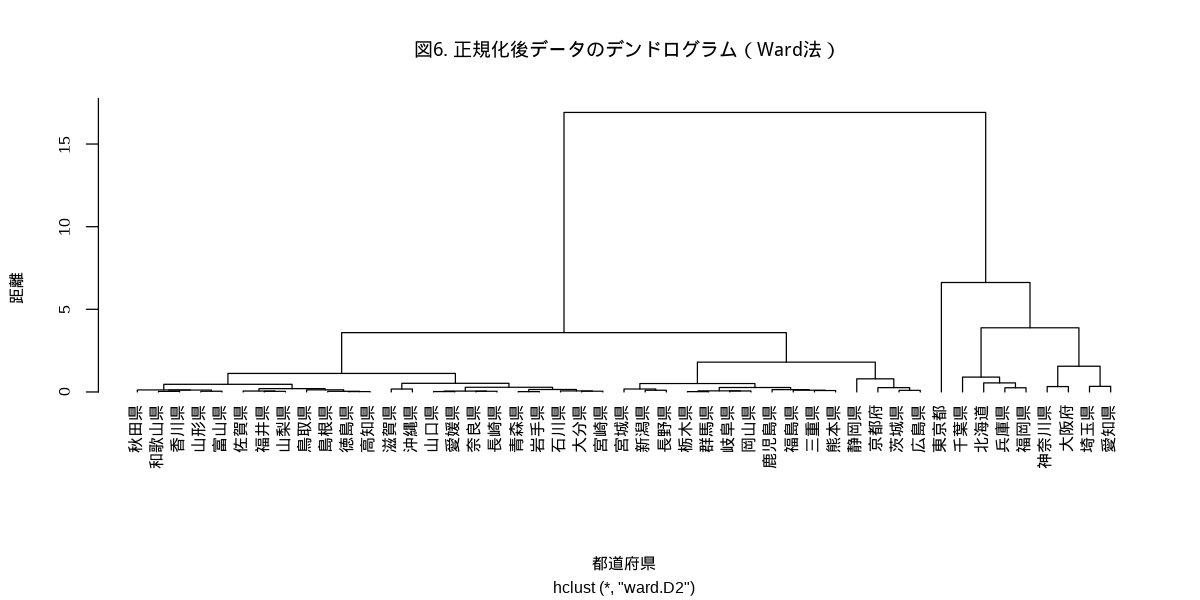

In [ ]:
dat1.normal = data.frame(scale(dat1))
hc = hclust(dist(dat1.normal), method="ward.D2")

options(repr.plot.width = 10, repr.plot.height = 5)
plot(hc, hang=-1, main="図6. 正規化後データのデンドログラム（Ward法）",
     xlab="都道府県", ylab="距離")

正規化前のものとあまり変わらない様子が見られる。2クラスターが妥当と思われるが、確認のためエルボー法とシルエット法を適用した。

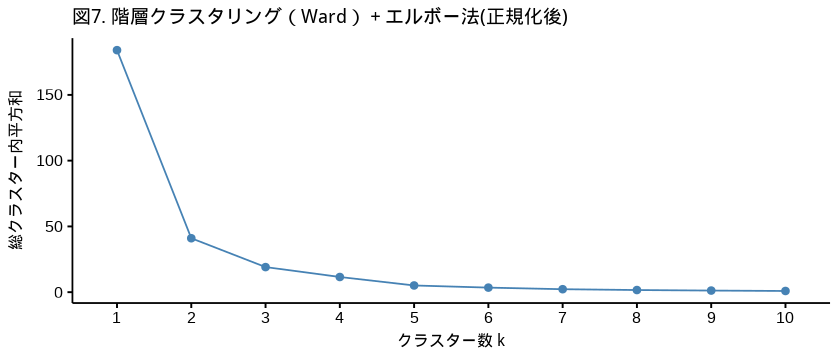

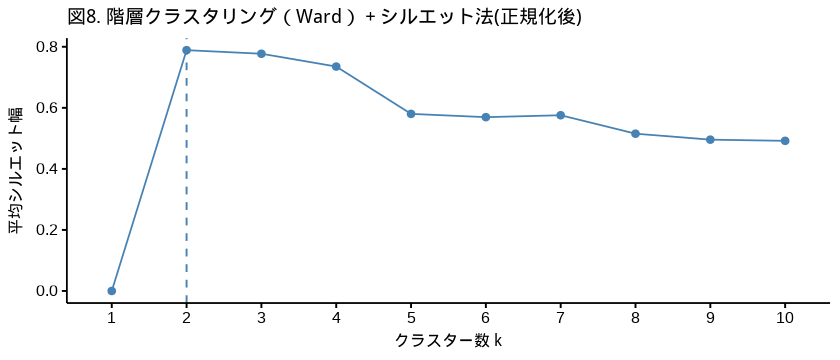

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 3)
fviz_nbclust(dat1.normal, FUN = hcut, method = "wss", hc_method = "ward.D2")+
labs(title = "図7. 階層クラスタリング（Ward）＋エルボー法(正規化後)",x = "クラスター数 k", y = "総クラスター内平方和")
fviz_nbclust(dat1.normal, FUN = hcut, method = "silhouette", hc_method = "ward.D2")+
labs(title = "図8. 階層クラスタリング（Ward）＋シルエット法(正規化後)",x = "クラスター数 k", y = "平均シルエット幅")

同じく2クラスターとしてクラスタ番号を保存し、プロットする。

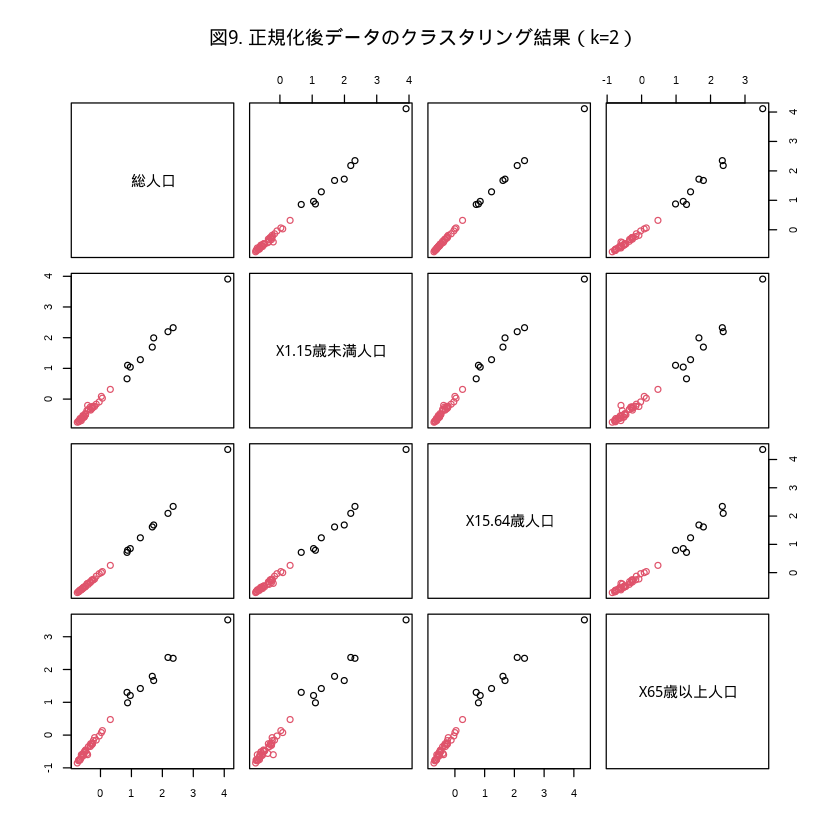

In [ ]:
cn = cutree(hc,2)
options(repr.plot.width = 7, repr.plot.height = 7)
plot(dat1.normal, col=cn, main="図9. 正規化後データのクラスタリング結果（k=2）")

頭文字を表示してプロットする。

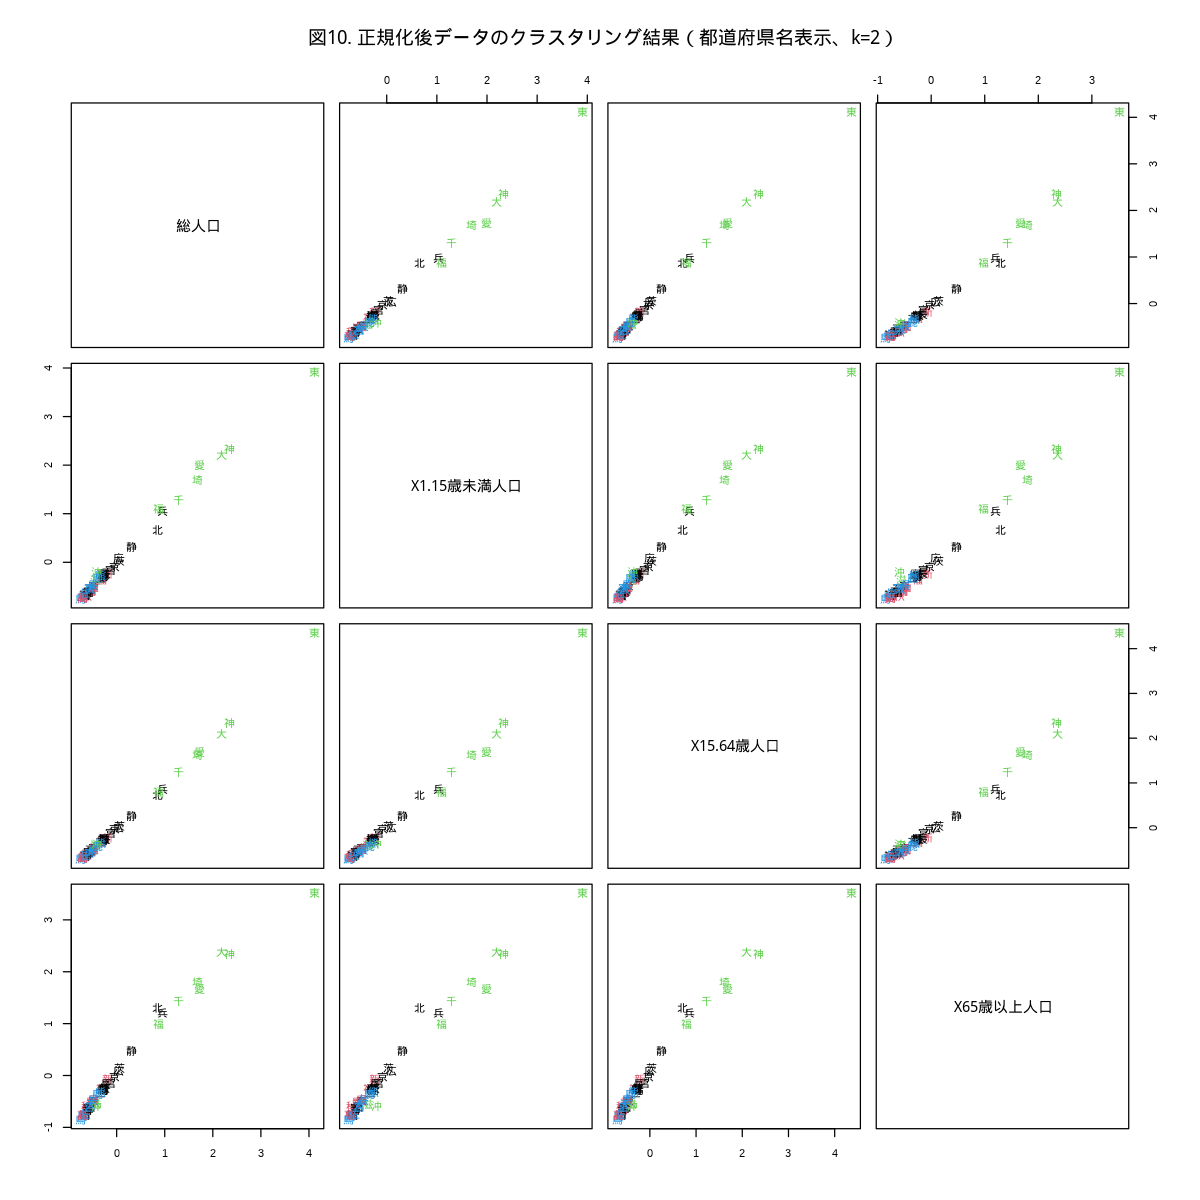

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(dat1.normal, col=cn, pch=rownames(dat1),
     main="図10. 正規化後データのクラスタリング結果（都道府県名表示、k=2）")

正規化した後もやはりほとんど同じ結果が得られた。ここで、正規化前後での平均値を比較してみる。

In [ ]:
dat1_normal_centers <- aggregate(dat1.normal, by=list(Cluster=cn), FUN=mean)

print("--- 表2. 正規化後データのクラスター平均値 ---")
print(dat1_normal_centers)

[1] "--- 表2. 正規化後データのクラスター平均値 ---"
  Cluster     総人口 X1.15歳未満人口 X15.64歳人口 X65歳以上人口
1       1  1.7802516       1.8003531    1.7423374     1.8438583
2       2 -0.4216385      -0.4263994   -0.4126589    -0.4367033


In [ ]:
dat1_original_centers <- aggregate(dat1, by=list(Cluster=cn), FUN=mean)

print("--- 表3. 正規化前のデータのクラスター平均値 ---")
print(dat1_original_centers)

[1] "--- 表3. 正規化前のデータのクラスター平均値 ---"
  Cluster  総人口 X1.15歳未満人口 X15.64歳人口 X65歳以上人口
1       1 7630556        846777.8    4730111.1     2053555.6
2       2 1450737        163263.2     819921.1      467342.1


上記2つを比較してみても分かるように、二つのクラスター間では変量間の傾向などの差ではなく、単純なサイズの大きさの差によって分けられていることが分かる。つまり人口のサイズが支配的であり、主に人口規模でクラスタリングされていると言える。

##3. ここまでの考察(前半)

プロットした散布図行列やデンドログラムなどから、日本の47都道府県における人口規模では東京や神奈川、大阪、愛知といった首都圏と、それ以外という2つにクラスタリングされることが分かった。しかしながらこれでは人口のサイズが支配的ゆえ、正規化を施しても総人口だけでクラスタリングしただけとさほど変わらないと思われる。そこで、次に人口割合を用いたクラスタリングを行うこととした。

一方で、本分析から「日本の人口の二極化」という傾向も明らかになった。都市圏に非常に多くの人口が集積し、結果的に都市か、その他かという2つでほとんど人口が拮抗するような状況になっていることが分かる。

##4. 新たな分析(後半)

新しく用意したcsvファイルのデータを分析する。詳細な解説はここでは割愛するが、人口増加率が、他の変量が%であるのに対し‰（パーミル）で表されているため、始めから正規化して分析することにする。

In [ ]:
dat2 = read.csv('https://raw.githubusercontent.com/b240317-prog/csvfile3/refs/heads/main/FEH_00200502_251015182518.csv', row.names=1)

In [ ]:
print("表4")
summary(dat2)

[1] "表4"


 X15歳未満人口割合 X15.64歳人口割合 X65歳以上人口割合   人口増減率     
 Min.   : 8.80     Min.   :51.60    Min.   :22.70     Min.   :-1.8700  
 1st Qu.:10.70     1st Qu.:54.50    1st Qu.:30.30     1st Qu.:-1.1850  
 Median :11.10     Median :56.50    Median :32.00     Median :-0.8400  
 Mean   :11.24     Mean   :56.92    Mean   :31.83     Mean   :-0.8394  
 3rd Qu.:11.70     3rd Qu.:58.50    3rd Qu.:34.30     3rd Qu.:-0.6250  
 Max.   :15.80     Max.   :66.80    Max.   :39.50     Max.   : 0.6600  

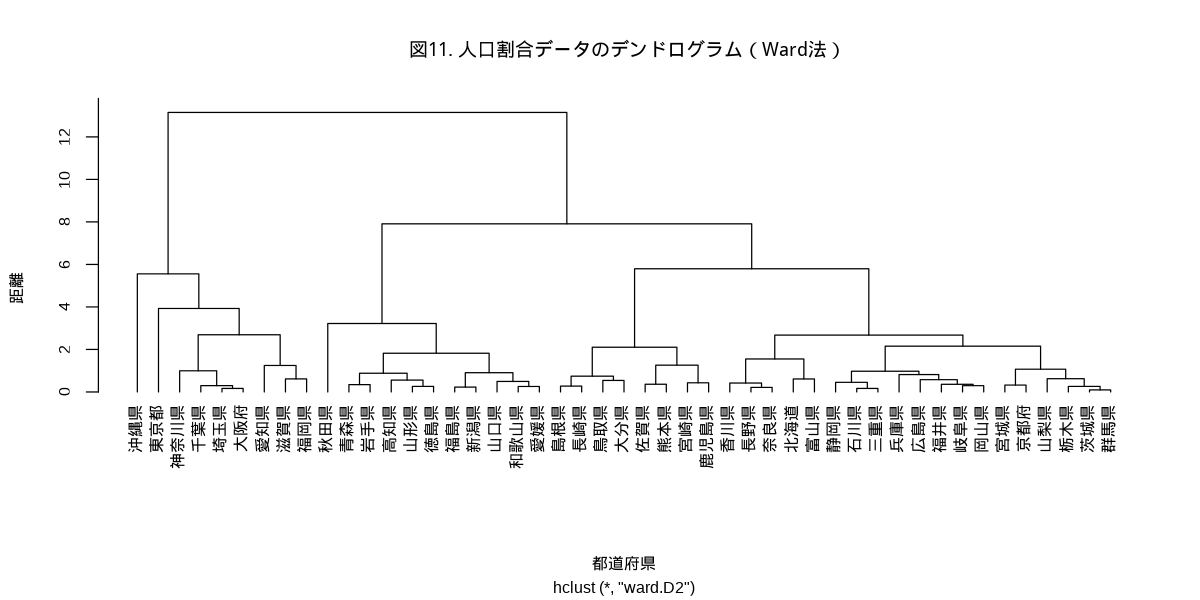

In [ ]:
dat2.normal = data.frame(scale(dat2))
hc = hclust(dist(dat2.normal), method="ward.D2")

options(repr.plot.width = 10, repr.plot.height = 5)
plot(hc, hang=-1, main="図11. 人口割合データのデンドログラム（Ward法）",
     xlab="都道府県", ylab="距離")

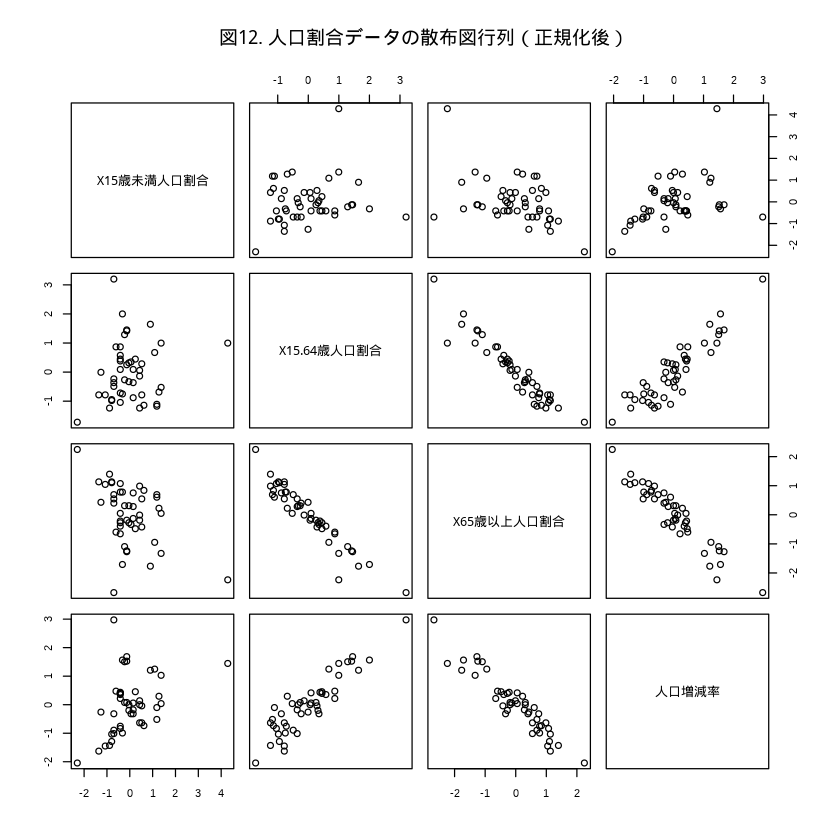

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(dat2.normal, main="図12. 人口割合データの散布図行列（正規化後）")

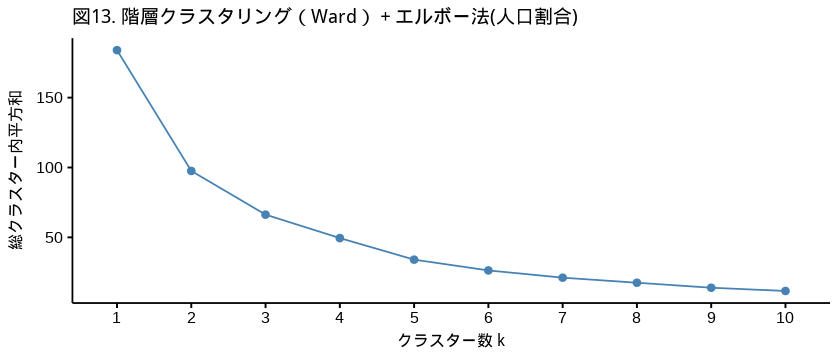

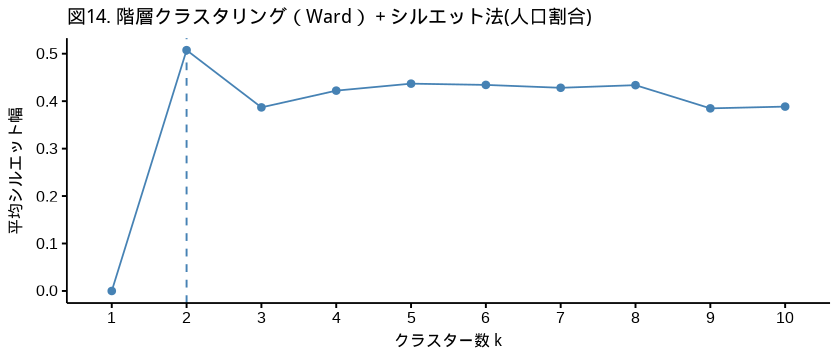

In [ ]:
library(factoextra)
options(repr.plot.width = 7, repr.plot.height = 3)
fviz_nbclust(dat2.normal, FUN = hcut, method = "wss", hc_method = "ward.D2")+
labs(title = "図13. 階層クラスタリング（Ward）＋エルボー法(人口割合)",x = "クラスター数 k", y = "総クラスター内平方和")
fviz_nbclust(dat2.normal, FUN = hcut, method = "silhouette", hc_method = "ward.D2")+
labs(title = "図14. 階層クラスタリング（Ward）＋シルエット法(人口割合)",x = "クラスター数 k", y = "平均シルエット幅")

デンドログラムを目視で確認すると、4つのクラスターに分けることが適切と判断される。

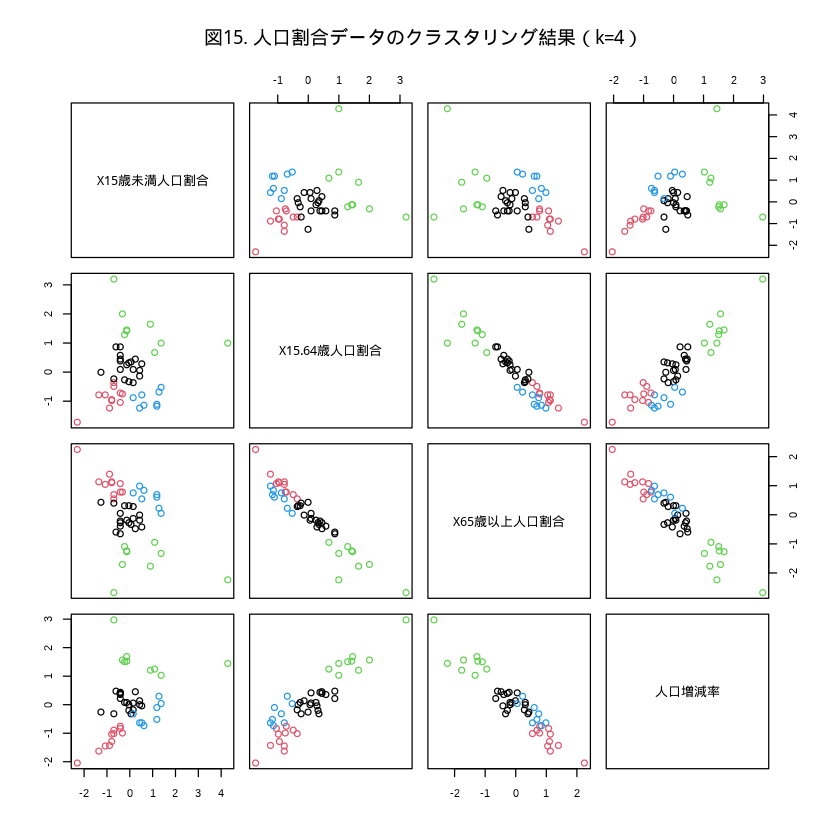

In [ ]:
cn = cutree(hc,4)
options(repr.plot.width = 7, repr.plot.height = 7)
plot(dat2.normal, col=cn, main="図15. 人口割合データのクラスタリング結果（k=4）")

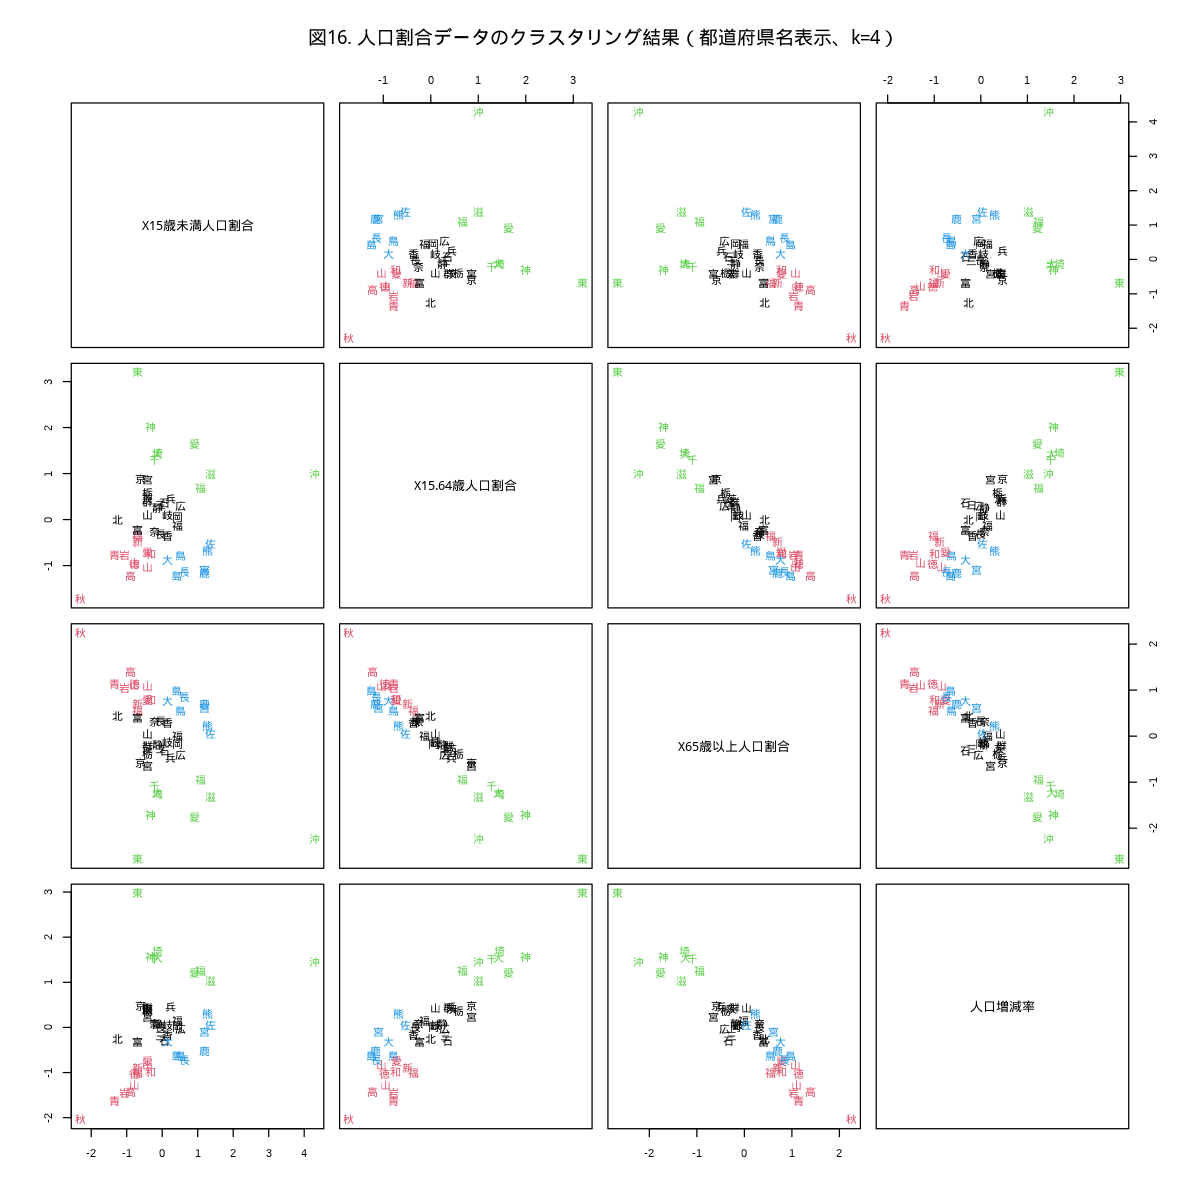

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot(dat2.normal, col=cn, pch=rownames(dat2),
     main="図16. 人口割合データのクラスタリング結果（都道府県名表示、k=4）")

In [ ]:
dat_ratio_centers_k4 <- aggregate(dat2.normal, by=list(Cluster=cn), FUN=mean)

print("--- 表5. 人口構造パターンに基づくクラスター平均値（k=4） ---")
print(dat_ratio_centers_k4)

[1] "--- 表5. 人口構造パターンに基づくクラスター平均値（k=4） ---"
  Cluster X15歳未満人口割合 X15.64歳人口割合 X65歳以上人口割合  人口増減率
1       1        -0.1638178        0.1942026        -0.1240277  0.09372691
2       2        -0.8867230       -0.8929017         1.0842329 -1.21472657
3       3         0.6812221        1.5185306        -1.5848635  1.57661344
4       4         0.8419365       -0.9418384         0.5867169 -0.32604249


## 5. 最終的な分析結果(後半)

以上の結果から、47都道府県は人口構造により大きく4つにクラスタリングできる。以下にその特徴を示す。

- 15歳未満人口、生産年齢人口共に極端に少なく、65歳以上人口が非常に多く人口増加率もマイナスな少子高齢化の進む地域(ex.秋田、青森)
- 15歳未満人口、生産年齢人口共に非常に多く、高齢化の進んでいない人口流入の多い人口増加率も高い地域(ex.東京、沖縄)
- 15歳未満人口は非常に多いが、生産年齢人口がかなり少なく、高齢化も進んでおり人口流出の多い、人口が減少傾向の地域(ex.島根、長崎)
- すべて平均的な地域(ex.兵庫、広島)

本分析により、日本の都道府県は人口構造の観点から明確に4つのパターンに分類されることが示された。都市機能の集中が進む一方で地方の活力は衰退しており、少子高齢化と第一次産業の衰退が同時進行している。災害時の物流や食料供給などの観点から、この地域間格差への対応が今後の重要な政策課題となるだろう。